In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_json("tenant_performance.json")

# Mengatasi missing values
# Untuk kolom 'employee' kita akan mengisi missing values dengan median
data['employee'].fillna(data['employee'].median(), inplace=True)

# Mengencode kolom kategorikal 'ownership'
le = LabelEncoder()
data['ownership_encoded'] = le.fit_transform(data['ownership'])

# Mengambil fitur numerik untuk clustering dan normalisasi data
features = ['tenure', 'employee', 'avg_num_visit', 'avg_promotion', 'avg_sales_call_duration', 'avg_visit_duration', 'revenue', 'ownership_encoded']
scaled_data = StandardScaler().fit_transform(data[features])

scaled_data_df = pd.DataFrame(scaled_data, columns=features)
scaled_data_df.head()


,tenure,employee,avg_num_visit,avg_promotion,avg_sales_call_duration,avg_visit_duration,revenue,ownership_encoded
0,-0.437778,1.370698,-1.308119,-0.535623,-0.050855,-0.729154,0.029777,0.649358
1,1.349435,0.003009,-0.172026,-0.762948,-0.842452,-0.988721,-0.331207,0.649358
2,0.455829,0.003009,0.195676,-1.023809,0.270251,0.189102,1.012537,-1.539982
3,-1.331384,-1.364681,0.215422,-0.746097,1.776990,-0.359015,0.341642,-1.539982
4,1.349435,0.003009,-0.495523,-0.895492,1.352343,0.771569,1.610534,0.649358


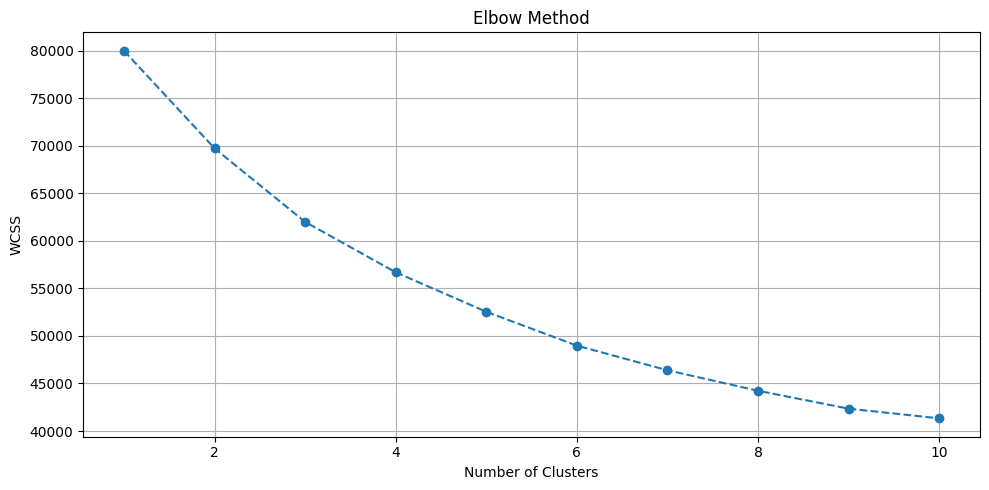

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menghitung WCSS untuk berbagai jumlah cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)

    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Menampilkan rata-rata fitur numerik dan ownership_encoded untuk setiap cluster
numerical_features = ['tenure', 'employee', 'avg_num_visit', 'avg_promotion', 'avg_sales_call_duration', 'avg_visit_duration', 'revenue', 'ownership_encoded']
cluster_summary_numerical = data.groupby('cluster')[numerical_features].mean()
cluster_summary_numerical


,tenure,employee,avg_num_visit,avg_promotion,avg_sales_call_duration,avg_visit_duration,revenue,ownership_encoded
cluster,,,,,,,,
0,2.489885,2.001891,7.859910,1.208185,0.927066,8.371858,-41.003756,1.000000
1,2.523572,2.013415,8.005272,1.162359,1.067198,9.805104,-23.427003,0.000000
2,2.448145,1.968126,8.083626,1.172716,2.065908,23.918208,133.580919,0.830162


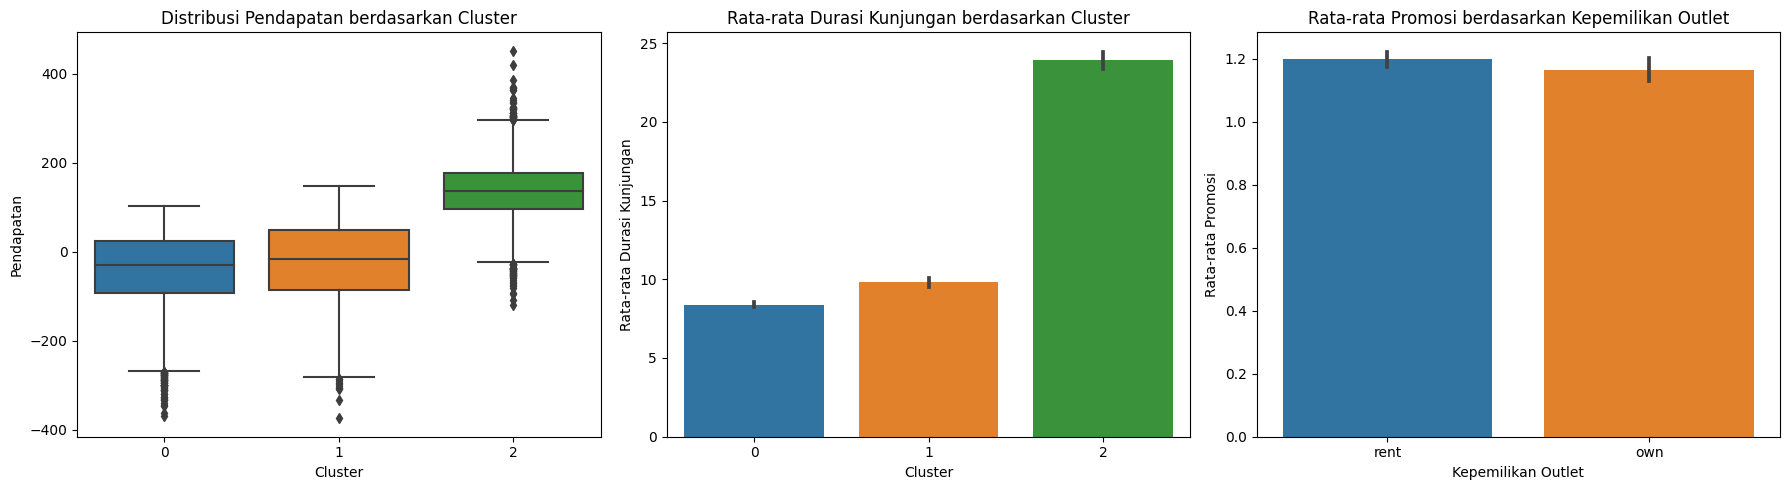

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# Visualisasi 1: Distribusi Pendapatan berdasarkan Cluster
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster', y='revenue', data=data)
plt.title('Distribusi Pendapatan berdasarkan Cluster')
plt.xlabel('Cluster')
plt.ylabel('Pendapatan')

# Visualisasi 2: Rata-rata Durasi Kunjungan berdasarkan Cluster
plt.subplot(1, 3, 2)
sns.barplot(x='cluster', y='avg_visit_duration', data=data)
plt.title('Rata-rata Durasi Kunjungan berdasarkan Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Durasi Kunjungan')

# Visualisasi 3: Rata-rata Promosi berdasarkan Kepemilikan Outlet
plt.subplot(1, 3, 3)
sns.barplot(x='ownership', y='avg_promotion', data=data)
plt.title('Rata-rata Promosi berdasarkan Kepemilikan Outlet')
plt.xlabel('Kepemilikan Outlet')
plt.ylabel('Rata-rata Promosi')

plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Pemilihan fitur dan target
X = data[features]
y = data['revenue']

# Pembagian data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pembuatan model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi Model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

r2, mae, rmse


(1.0, 4.3972898239319494e-14, 5.774677853372533e-14)